## Setting up file name

In [22]:
import os
path = '/Users/astridvacher/SSE/Centuri Summer School documents/Neuroscience project/2022_CENTURI-SummerSchool-main/datasets/dataset1_reaching-task'
fname = os.path.join(path, 'Dataset1.mat')
from scipy.io import loadmat
DATA = loadmat(fname)

## Import necessary libraries

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [30]:
R = DATA['R']
R = R.transpose()
direction = DATA['direction']

In [31]:
DATA['R'].shape

(143, 158)

In [32]:
DATA.keys()

dict_keys(['__header__', '__version__', '__globals__', 'direction', 'R'])

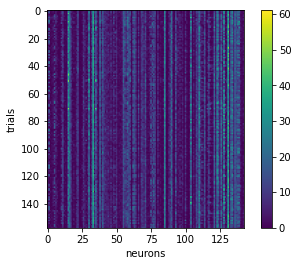

In [33]:
plt.imshow(R)
plt.xlabel('neurons')
plt.ylabel('trials')
plt.colorbar()
plt.show()

Choose the mean of trials depending on direction

In [34]:
#Extract the different directions
R_mean = np.zeros((143, 8))
for direction_ in range(8):
    R_mean[:, direction_] = R[np.where(direction==direction_+1)[0], :].mean(axis=0)

Plot the results : mean of each direction for the first neurone

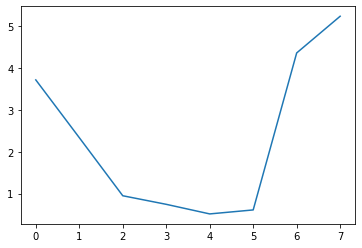

In [35]:
plt.plot(R_mean[0,:])

## Fitting Von Mises Curves for each neuron

In [117]:
def tuning_function(x, mu, kappa, fmax, bsl):
    # Von Mises, with kappa the concentration, mu the location
    # fmax the firing rate at pref ori, bsl the min firing rate (not the baseline, which was substracted) 
    tf = bsl + np.exp(kappa*(np.cos(x-mu)-1)) * (fmax-bsl)
    return tf

from lmfit import Model, Parameters

def fit_tc(array, init_kappa):
    x = np.linspace(0, 2*np.pi, len(array), endpoint=False)

    mod = Model(tuning_function)
    pars = Parameters()
    pars.add_many(('mu', x[np.argmax(array)], True, 0., 2*np.pi),
                  ('kappa', init_kappa, True,  .1, 60.),
                  ('fmax', np.max(array), True, 0.01, 2*np.max(array)),
                 ('bsl', np.min(array), True, 0.0, 1+np.max(array)))
    out = mod.fit(array, pars, x=x, nan_policy='omit', max_nfev=50000)

    return out.best_values

In [118]:
values_n1 = fit_tc(R_mean[0,:],2)
theta = np.linspace(0,2*np.pi,len(R_mean[0,:]),endpoint=False)

fitted_VM1 = tuning_function(theta,values_n1['mu'],values_n1['kappa'],values_n1['fmax'],values_n1['bsl'])


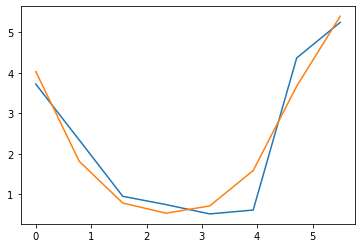

In [119]:
plt.plot(theta,R_mean[0,:])
plt.plot(theta,fitted_VM1)

In [124]:
values = np.zeros((143,4))
fit_VM = np.zeros((143,8))

for i in range(143):
    values[i,:] = np.array(list(fit_tc(R_mean[i,:],2).values()))
    fit_VM[i,:]=tuning_function(theta,values[i,0],values[i,1],values[i,2],values[i,3])
    
def plot_fitting(i):
    plt.plot(theta,R_mean[i,:])
    plt.plot(theta,fit_VM[i,:])

In [125]:
fit_VM

array([[ 4.02778648,  1.81204893,  0.78390956, ...,  1.58526869,
         3.66443348,  5.3919796 ],
       [ 1.93527697,  4.95052167, 14.34238159, ...,  7.57236933,
         2.61373456,  1.48540418],
       [ 2.07542255,  1.62292091,  1.07012791, ...,  0.9067057 ,
         1.37508013,  1.93774155],
       ...,
       [ 3.3217472 ,  3.3217472 ,  3.32192125, ...,  3.32188656,
         3.3217472 ,  3.3217472 ],
       [ 0.80726274,  0.80731718,  1.51803693, ...,  0.80726274,
         0.80726274,  0.80726274],
       [ 3.56140317,  2.56008035,  1.78692485, ...,  2.31462671,
         3.31636086,  3.9645089 ]])

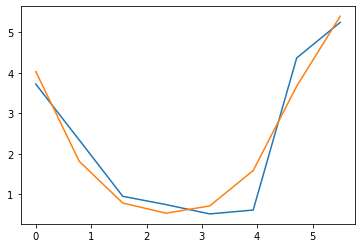

In [129]:
plot_fitting(0)